# What is Text Classification?
Text classification is a common task in natural language processing, which involves assigning labels or categories to documents, depending upon the contents of the texts. Text classification has a variety of applications, such as detecting user sentiment from a tweet, classifying an email as spam or ham, classifying blog posts into different categories, etc.

In this project, we will build and compare three text classifiers to classify text messages to respective news categories using Python and Scikit-Learn. The classifiers we will use are Multinomial Naive Bayes (MultinomialNB), Complement Naive Bayes (ComplementNB) which is suited for imbalanced datasets, and Linear Support Vector Classification (LinearSVC).

# Importing Libraries

In [1]:
%matplotlib inline
import numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import sklearn
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [2]:
# load the csv data
df = pd.read_csv('bbc-text.csv')
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


# Preprocessing dataset


#check null values
df.isnull().sum()

In [3]:
#disolay no. of label_nmae on each class
df['category'].value_counts()

category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

In [4]:
X = df['text']
Y = df['category']
len(X)
len(Y)

2225

# Data analysis


<Axes: >

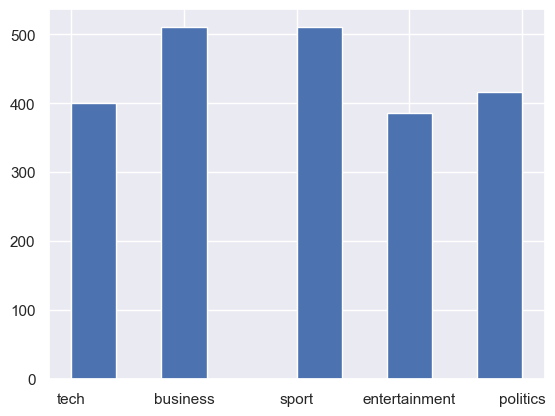

In [5]:
df['category'].hist()

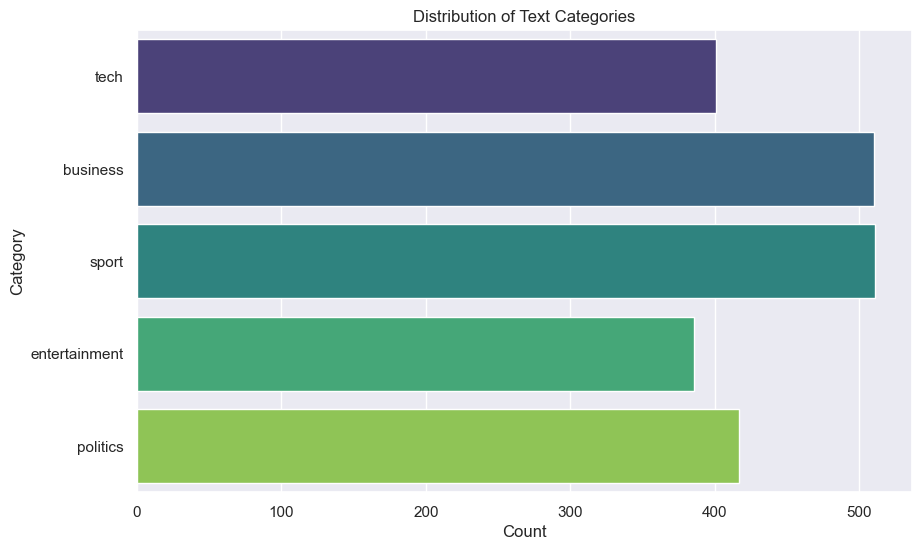

In [6]:
# Visualize class distribution
plt.figure(figsize=(10, 6))
sns.countplot(y=df['category'], palette='viridis')
plt.title('Distribution of Text Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

# Splitting the Dataset

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=143)

In [8]:
len(X_train)

1780

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Scikit-learn pipeline

In [10]:
pipeMNB = Pipeline([('tfidf',TfidfVectorizer(stop_words='english')),('clf',MultinomialNB())])
pipeCNB = Pipeline([('tfidf',TfidfVectorizer(stop_words='english',ngram_range=(1,3))),('clf',ComplementNB())])
pipeSVC = Pipeline([('tfidf',TfidfVectorizer(stop_words='english',ngram_range=(1,3))),('clf',LinearSVC())])

# Building and Evaluating Models

In [11]:
pipeMNB.fit(X_train,Y_train)
predictMNB = pipeMNB.predict(X_test)
print(f"MultinomialNB:{accuracy_score(Y_test,predictMNB):.2f}")

pipeCNB.fit(X_train,Y_train)
predictCNB = pipeCNB.predict(X_test)
print(f"ComplementNB:{accuracy_score(Y_test,predictCNB):.2f}")

pipeSVC.fit(X_train,Y_train)
predictSVC = pipeSVC.predict(X_test)
print(f"LinearSVC:{accuracy_score(Y_test,predictSVC):.2f}")

MultinomialNB:0.96
ComplementNB:0.98
LinearSVC:0.98


# Results of our text classification

In [12]:
message = "you have won a $10000 prize! contact us fot eh reward!"
result = pipeSVC.predict([message])
print("Result: ", result[0])

Result:  entertainment


In [13]:
print(classification_report(Y_test,predictSVC))

               precision    recall  f1-score   support

     business       1.00      0.93      0.96        97
entertainment       0.99      0.99      0.99        70
     politics       0.96      0.98      0.97       100
        sport       1.00      1.00      1.00       107
         tech       0.93      1.00      0.97        71

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445



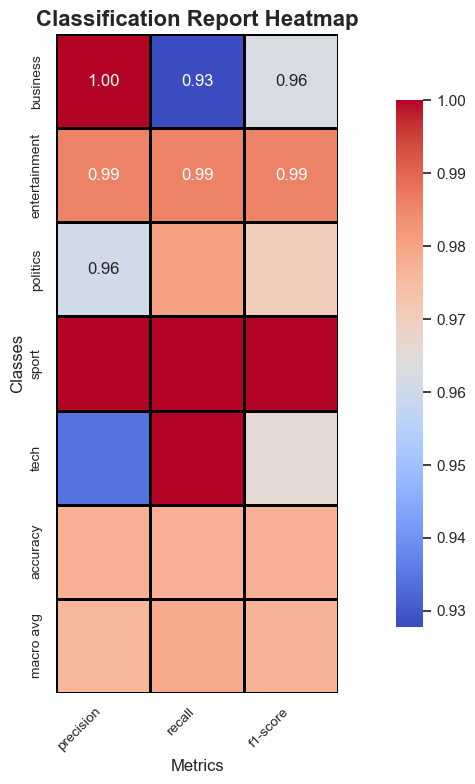

In [16]:
# Generate the classification report as a dictionary
report = classification_report(Y_test,predictSVC, output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(12, 8))
sns.heatmap(
    report_df.iloc[:-1, :-1],
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"shrink": 0.8, "orientation": "vertical"},
    linewidths=1,
    linecolor="black",
    square=True,
)

# Add titles and labels
plt.title("Classification Report Heatmap", fontsize=16, fontweight="bold")
plt.xlabel("Metrics", fontsize=12)
plt.ylabel("Classes", fontsize=12)
plt.xticks(fontsize=10, rotation=45, ha="right")
plt.yticks(fontsize=10)
plt.tight_layout()

# Show the heatmap
plt.show()

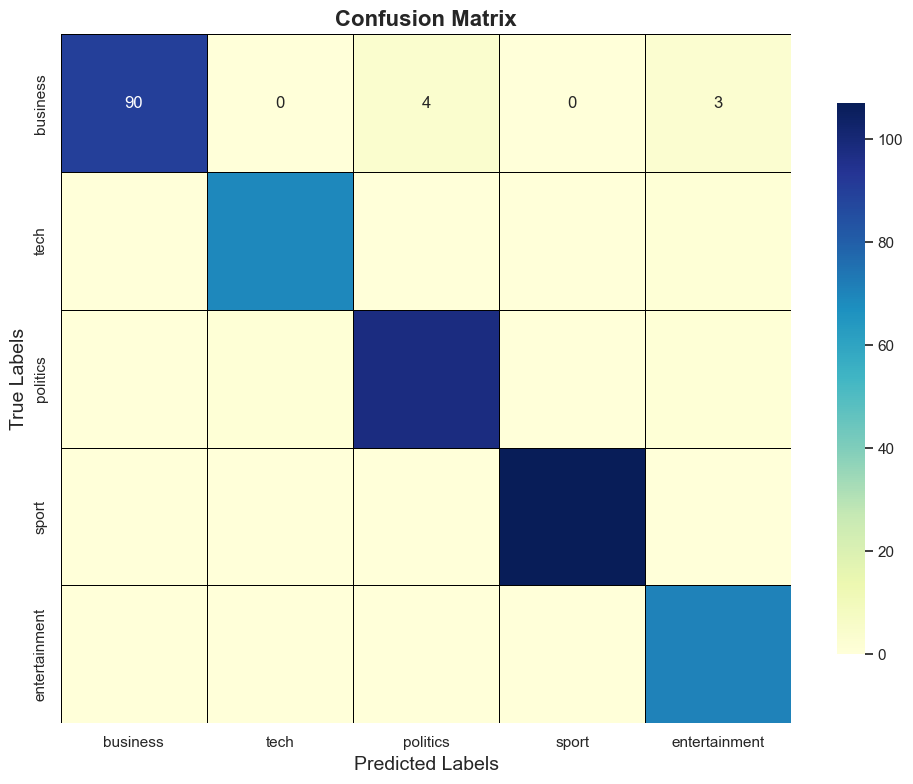

In [17]:
cm = confusion_matrix(Y_test, predictSVC)

plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="YlGnBu",
    xticklabels=set(Y_test),  # Use unique labels for axes
    yticklabels=set(predictSVC),
    cbar_kws={"shrink": 0.8},
    linewidths=0.5,
    linecolor="black"
)

# Add titles and labels
plt.title("Confusion Matrix", fontsize=16, fontweight="bold")
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)

# Show the heatmap
plt.tight_layout()
plt.show()


In [28]:
# Save models and vectorizer
joblib.dump(pipeMNB.named_steps['clf'], 'naive_bayes_model.pkl')  # MultinomialNB
joblib.dump(pipeCNB.named_steps['clf'], 'complement_nb_model.pkl')  # ComplementNB
joblib.dump(pipeSVC.named_steps['clf'], 'svm_model.pkl')  # LinearSVC
joblib.dump(pipeMNB.named_steps['tfidf'], 'vectorizer.pkl')  # Save vectorizer

['vectorizer.pkl']